In [3]:
a = 2 
print(a)

2


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [5]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 300, class_sep = 1.2, random_state = 100, \
                            n_redundant = 0, shift = 50, n_features = 2, n_informative = 2)

df = pd.DataFrame(data = np.c_[X, y], columns = ['f1', 'f2', 'target'])
df.head()

,f1,f2,target
0,49.035346,48.085802,0.0
1,50.074002,51.723957,1.0
2,52.768673,51.402260,1.0
3,51.958848,52.137289,1.0
4,51.590931,51.367235,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      300 non-null    float64
 1   f2      300 non-null    float64
 2   target  300 non-null    float64
dtypes: float64(3)
memory usage: 7.2 KB


In [7]:
df['target'].value_counts()

target
1.0    151
0.0    149
Name: count, dtype: int64

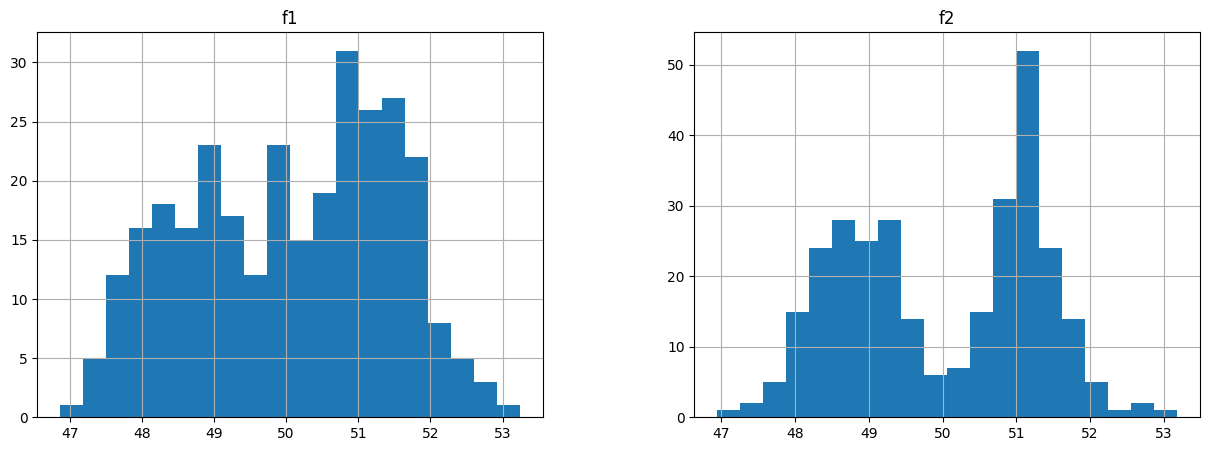

In [8]:
df[['f1', 'f2']].hist(figsize = (15, 5), bins = 20)
plt.show()

Normally distributed features results in better performance.

<Axes: xlabel='f1', ylabel='f2'>

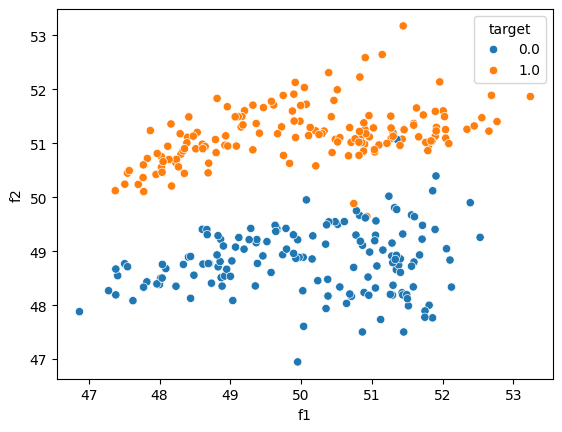

In [9]:
#scatter plot using seaborn and make target as hue
sb.scatterplot(data = df, x = 'f1', y = 'f2', hue = 'target')

In [12]:
#scale the data
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(df[['f1', 'f2']])

X_norm_pad = np.c_[np.ones(df.shape[0]), X_norm]
y_vec = np.array(df.target).reshape(-1, 1)

print(X_norm_pad.shape, X_norm.shape, df.target.shape, y_vec.shape)
X_norm_pad[:5]

(300, 3) (300, 2) (300,) (300, 1)


array([[1.        , 0.34011639, 0.18271239],
       [1.        , 0.50315366, 0.76698046],
       [1.        , 0.92613462, 0.71531761],
       [1.        , 0.79901689, 0.8333593 ],
       [1.        , 0.74126513, 0.70969281]])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm_pad, y_vec, test_size = 0.2, random_state = 100)

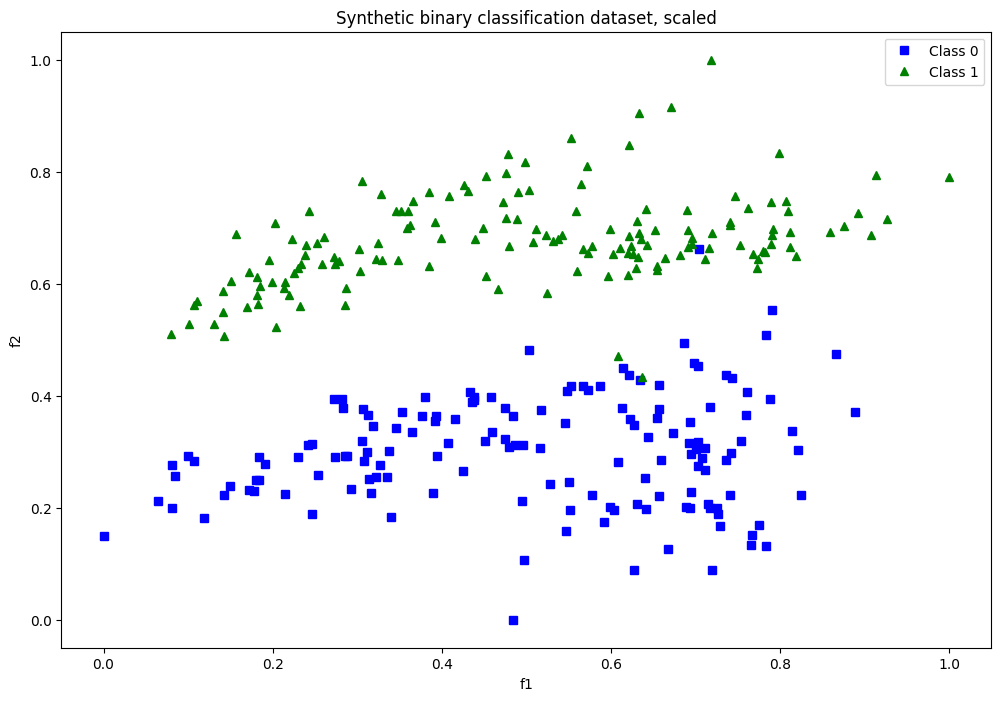

In [24]:
plt.figure(figsize=(12,8))
# Plotting class 0 data
plt.plot(X_norm_pad[:,1][y==0], X_norm_pad[:,2][y==0], 'bs', label='Class 0')

# Plotting class 1 data
plt.plot(X_norm_pad[:,1][y==1], X_norm_pad[:,2][y==1], 'g^', label='Class 1')

# labeling plot
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title('Synthetic binary classification dataset, scaled')
plt.legend()
plt.show()

In [27]:
#find unique value counts in numpy.ndarray
a = np.unique(y_train, return_counts = True)
b = np.unique(y_test, return_counts = True)
print(a, b)

(array([0., 1.]), array([116, 124], dtype=int64)) (array([0., 1.]), array([33, 27], dtype=int64))


## Bayesian Logistic Regression

Bayesian Logistic Regression is a type of logistic regression that uses Bayesian inference to estimate the model parameters.

In traditional logistic regression, the model parameters are estimated using maximum likelihood estimation. Bayesian Logistic Regression, on the other hand, uses Bayesian inference to estimate the model parameters. This involves specifying a prior distribution for the model parameters and updating this prior distribution with the observed data to obtain a posterior distribution for the model parameters.

The Bayesian approach to logistic regression has several advantages. It allows for the incorporation of prior knowledge or beliefs about the model parameters, which can be useful when the sample size is small or when there is limited data available. It also provides a framework for estimating model uncertainty, which can be useful in situations where the data is uncertain or when the model is subject to multiple interpretations.


logistic regression gives the probability of positive class given feature vector computed using __hypothesis function__ as:

$$
\boxed{P(y_i=1|\mathbf{x}_i,\boldsymbol \beta)= h_i = \underbrace{\frac{e^{(\mathbf{x}_i^T\boldsymbol \beta)}}{1+e^{(\mathbf{x}_i^T\boldsymbol \beta)}}}_{\sigma(\mathbf{x})} = \frac{1}{1+e^{-(\mathbf{x}_i^T\boldsymbol \beta)}}} \tag{1}
$$

Where, $\beta$ is the parameter of the model, $y_i$ and $\mathbf{x}_i$ is the $i^{th}$ true target class and covariate vector, and $\sigma(x)$ is the sigmoid function.

Unlike point estimation method such as MLE and MAP, bayesian estimation gives the probability distribution over the parameter $\boldsymbol \beta$, i.e. posterior distribution. Next, for the  computation the posterior distribution we use bayes theorem as:

$$
\boxed{p(\boldsymbol \beta \vert \mathcal{D}) = \frac{p(\mathcal D \vert \boldsymbol \beta ) p(\boldsymbol \beta) }{\underbrace{p(\mathcal D)}_{\text{constant}} }\propto p(\mathcal D \vert \boldsymbol \beta ) p(\boldsymbol \beta)} \tag{2}
$$

Or,

$$
\text{Posterior} = \text{Constant} \times \text{Likelihood} \times \text{Prior}
$$

Where, the constant normalization term, __evidence__ is given as:

$$
\boxed{P(\mathcal{D}) = \int_{\boldsymbol \beta' \in B} p(\mathcal D \vert \boldsymbol \beta' ) p(\boldsymbol \beta') d\boldsymbol \beta'} \tag{3}
$$

Along with that, for prediction of future data points one require computing the __predictive distribution__ $p(y_i \vert \mathcal{D})$, written in the form of marginalization over paramters $\boldsymbol \beta$ as:

$$
\boxed{p(y_i \vert \mathcal D) = \int p(y_i \vert \mathbf{x}_i, \boldsymbol \beta) \ p(\boldsymbol \beta \vert \mathcal D) \ d\boldsymbol \beta} \tag{4}
$$

Unfortunately, __bayesian inference for logistic regression model is intractable__. Precisely, evaluation of posterior distribution requires computing the normalization (evidence) term comprising the likelihood function and prior. Since, the __likelihood function__ $P(\mathbf{y}|\it{X}, \boldsymbol \beta)$ of logistic regression model  given in terms of __bernoulli distribution__ as,

$$
\boxed{p(\mathcal D \vert \boldsymbol \beta ) = p(\mathbf{y} \vert \it{X}, \boldsymbol \beta) =  \prod_{i=1}^n p(y_i \vert \mathbf{x}_i, \boldsymbol \beta)
= \prod_{i=1}^nh_i^{y_i}(1-h_i)^{1-y_i}} \tag{5} 
$$

comprises of product of sigmoid functions (transcendental function) for every data point, there is no closed-form solution for the evidence. Consequently, there's no closed-form solution for posterior distribution and also the predictive function.

Note: The dimension for weight vector is:

$$\boldsymbol \beta = \begin{pmatrix}
\beta_0 \\
\beta_1 \\
\vdots \\
\beta_m 
\end{pmatrix}_{\text{((m+1) $\times$ 1)}},
$$

In [29]:
sigmoid = lambda x: 1/(1 + np.exp(-x))

In [30]:
def calculate_hypothesis(input_feature, beta):
    z = input_feature.dot(beta)
    hypothesis = sigmoid(z)
    return hypothesis

## Laplace Approximation

The Laplace approximation is a method used in Bayesian inference to approximate the posterior distribution of a parameter given observed data. It is based on the idea that the posterior distribution can be approximated by a Gaussian distribution with parameters that are obtained by taking the Laplace approximation of the log-posterior distribution.

The Laplace approximation involves approximating the posterior distribution of a parameter with a Gaussian distribution. This is done by taking the expected value of the log-posterior distribution with respect to the other parameters, and then using this expected value as the mean of the Gaussian distribution. The variance of the Gaussian distribution is obtained by taking the negative second derivative of the log-posterior distribution with respect to the parameter of interest.

The Laplace approximation is particularly useful when the posterior distribution is complex or intractable, and when the observed data is limited. It provides a simple and efficient way to obtain approximate posterior distributions for model parameters in situations where exact inference is difficult or impossible.

In [32]:
#initializing params m_0 and covariance matrix S_0 of the prior 
#distribution such that it is multivariate standard normal. 

m_0 = np.zeros(X_train.shape[1])
S_0 = np.identity(X_train.shape[1])